<center>

<h1 style="color:red">🌟💥 Fine-tune<strong> ARABERT</strong>  to Arabic Tunisian Dialect 🙂😞😠</h1>

</center>


# 1.Introduction :

**<p style="color:blue">📚 ARABERT: Fine-tune to Arabic Tunisian Dialect 🇹🇳</p>**

Welcome to this notebook, where we explore the fascinating world of natural language processing (NLP) and sentiment analysis using **ARABERT** : a powerful `BERT-based `model fine-tuned specifically for Arabic dialect. 

In this notebook, we aim to harness the capabilities of **ARABERT** to understand and classify sentiment in text data written in Tunisian Arabic. By leveraging the pre-trained **ARABERT** model and adapting it to our specific domain, we can achieve accurate sentiment analysis for Tunisian dialect text.

Throughout the notebook, we will cover various steps in the `NLP` pipeline, including data preprocessing, tokenization, model architecture, training, evaluation, and prediction. We will walk through each step, providing detailed explanations and code examples to ensure a comprehensive understanding of the process.

By the end of this notebook, you will have the knowledge and skills to apply **ARABERT** or other pretrained model for sentiment analysis on your own Tunisian Arabic text data or other language. This notebook serves as a valuable resource for those interested in cutting-edge `NLP` models, sentiment analysis tasks, and working with pre-trained models like **ARABERT**.

So let's dive into the world of **ARABERT** and discover how it can help us unlock valuable insights from Tunisian dialect text data. Don't forget to upvote and share this notebook if you find it useful, and stay tuned for future updates and enhancements.

Let's get started! 🚀

## 1.Import packages :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # We use regular expressions for data cleaning
import warnings
warnings.filterwarnings('ignore')
import joblib
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,f1_score, roc_auc_score, roc_curve, # evaluatin metrics
                             confusion_matrix,classification_report)
import tensorflow as tf
import transformers
from transformers import TFAutoModel, AutoTokenizer , pipeline


## 2.Data Exploration :

In [2]:
df1= pd.read_excel('../input/tunisian-texts/tun.xlsx',header=0)


In [3]:
df2= pd.read_csv("/kaggle/input/costumer-reviews/costumer_reviews.csv").drop('Unnamed: 0',axis=1)
df2


,texts,data_labels
0,محل خدمة الزبون ممتاز,1
1,خدمة مرضية برشا,1
2,الشغل متقن ومتنسق,1
3,منتجات عالية الجودة,1
4,الموظفين محترفين جداً,1
...,...,...
261,ما فهمتش ليه المنتج مش بنفس الصورة,0
262,تسليم متأخر ومزعج,0
263,المنتج غير مريح ومش ملائم,0
264,ما لقيتش دعم واهتمام من الشركة,0


In [4]:
print(df1.shape)
print(df1.sample(10))

(32818, 2)
                                                   texts  data_labels
21436                        [Nesrin Asfouri Ep Chayrit]            1
31587  [لزم تستخدم القوة لناس اللي مش ملتزما بالحجر ا...            0
1636           [ربي يحفظك أخي العزيزماشاء لله قوة بالله]            1
25005  [صارحو الناس يهديكم عالاقل باش ياخذو الاحتياطا...            1
4468                                         [سترك يارب]            1
4882                                  [كذب الحدود مسكرة]            1
4852                                     [#كفا_استهتار💔]            1
23293                            [ان شاء الله رب يسترنا]            1
15878                                            [Ok😷😆☺]            1
27269                                     [فمة حكاية 🤔🤔]            1


In [5]:
df1[df1.texts.str.contains("https")].sample(10)

,texts,data_labels
7707,[https//wwfacebookcom/nassimmaalej/videos/2962...,1
7206,[https//mfacebookcom/storyphp?story_fbid=27670...,1
8900,[التفاصيل 👈 https//bitly/3b3ZUQU],1
10587,[https//wwyoutubecom/watch?v=6NeOmA0Q7lI&t=2744s],1
16624,[https//wwfacebookcom/groups/2773143122720792/],1
19571,[حتى انت تنجم تصنع كمامة ومعقم لليدين بابسط طر...,1
27078,[https//wwfacebookcom/groups/688404594913137/],1
22446,[https//youtube/Jzzbknz1WI4],1
7208,[https//wwfacebookcom/groups/693923858016873/],1
14735,[https//youtube/BafEz_OxzfE],1


In [6]:
len(df1[df1.texts.str.contains("https")])

260

In [7]:
df=pd.concat([df1,df2],axis=0)
df.shape

(33084, 2)

In [8]:

def data_cleaning(text):
    """Clean and preprocess text data.
    Args:
        text (pd.Series): A pandas Series containing text data to be cleaned.
    Returns:
        pd.Series: A pandas Series with the cleaned text data.

    Cleaning Steps:
    - Removes emojis and special characters like '\x89Û_', '&amp', etc.
    - Replaces consecutive dots with an empty string.
    - Removes '#' symbol from text.
    - Removes user names starting with '@'.
    - Removes URLs starting with 'http' or 'https'.
    - Converts text to lowercase.
    - Removes extra whitespaces between words.

    """
    clean = text
    # Replace consecutive dots with an empty string
    pattern = re.compile('\\.+?(?=\B|$)')
    clean = clean.apply(lambda r: re.sub(pattern, string=r, repl=''))  
    # Replace '\x89Û_' with a whitespace
    pattern = re.compile('\x89Û_')  
    clean = clean.apply(lambda r: re.sub(pattern, string=r, repl=' ')) 
    # Replace '&amp' with '&'
    pattern = re.compile('\&amp')  
    clean = clean.apply(lambda r: re.sub(pattern, string=r, repl=' '))  
     # Replace newline characters with a whitespace
    pattern = re.compile('\\n')  
    clean = clean.apply(lambda r: re.sub(pattern, string=r, repl=' ')) 
    # Remove '#' symbol from text
    clean = clean.apply(lambda r: r.replace('#', ''))  
    # Replace user names with '@'
    pattern = re.compile('@[a-zA-Z0-9\_]+')  
    clean = clean.apply(lambda r: re.sub(pattern, string=r, repl='@'))  
    # Remove URLs
    pattern = re.compile('https?\S+(?=\s|$)')  
    clean = clean.apply(lambda r: re.sub(pattern, string=r, repl='www')) 
    # Convert text to lowercase
    clean = clean.apply(lambda r: r.lower())  
    # Remove extra whitespaces
    clean = clean.apply(lambda r: ' '.join(r.split()))  # Remove extra whitespaces between words

    return clean

In [9]:
df['texts'] = data_cleaning(df['texts'])


In [10]:
def create_arabert(model_name):
    """Create a classification model using AraBERT.

    Args:
        model_name (str): Name of the pre-trained AraBERT model to use.

    Returns:
        tf.keras.Model: Compiled classification model.

    This function creates a classification model based on AraBERT. It takes the model_name,
    initializes the AraBERT model, and then adds a classification head on top of it.

    The classification head consists of a Dense layer with sigmoid activation, which is
    suitable for binary classification tasks. The model is compiled with the Adam optimizer
    and binary cross-entropy loss.

    """
    # Define token ids as inputs
    word_inputs = tf.keras.Input(shape=(120,), name='word_inputs', dtype='int32')

    # Call AraBERT model
    arabert = TFAutoModel.from_pretrained(model_name)
    input_ids = word_inputs
    attention_mask = tf.where(input_ids != 0, 1, 0)  # Creating attention mask
    arabert_encodings = arabert(input_ids, attention_mask=attention_mask)[0]

    # CLASSIFICATION HEAD
    # Collect last hidden state (CLS)
    doc_encoding = tf.squeeze(arabert_encodings[:, 0:1, :], axis=1)
    # Apply dropout for regularization
    doc_encoding = tf.keras.layers.Dropout(.1)(doc_encoding)
    # Final output
    outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(doc_encoding)

    # Compile model
    model = tf.keras.Model(inputs=[word_inputs], outputs=[outputs])

    # Optional: Set class weights if dealing with imbalanced data
   
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='binary_crossentropy',
                      metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    return model


In [11]:
tweets = df['texts']
labels = df['data_labels']

X_train, X_test, y_train, y_test = train_test_split(tweets, labels,stratify=labels, test_size=0.15, random_state=1)

In [12]:
def preprocess_input_data(texts, tokenizer, max_len=120):
    """Tokenize and preprocess the input data for Arabert model.

    Args:
        texts (list): List of text strings.
        tokenizer (AutoTokenizer): Arabert tokenizer from transformers library.
        max_len (int, optional): Maximum sequence length. Defaults to 120.

    Returns:
        Tuple of numpy arrays: Input token IDs and attention masks.
    """
    # Tokenize the text data using the tokenizer
    tokenized_data = [tokenizer.encode_plus(
        t,
        max_length=max_len,
        pad_to_max_length=True,
        add_special_tokens=True) for t in texts]

    # Extract tokenized input IDs and attention masks
    input_ids = [data['input_ids'] for data in tokenized_data]
    attention_mask = [data['attention_mask'] for data in tokenized_data]

    return input_ids, attention_mask

In [13]:

# Download Arabert tokenizer
arabert_tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabert')

# Preprocess the training data
X_train_input_ids, X_train_attention_mask = preprocess_input_data(X_train, arabert_tokenizer)


In [14]:
arabert_model = 'aubmindlab/bert-base-arabert'
arabert = create_arabert(arabert_model)


### Training

## Training + Evaluation :

In [15]:
tf.random.set_seed(3)

hist = arabert.fit(
    x=X_train_input_ids,
    y=y_train.to_list(),
    epochs=3,
    batch_size=16
)


Train on 28121 samples
Epoch 1/3
28121/28121 [==============================] - 461s 16ms/sample - loss: 0.3447 - accuracy: 0.8567 - precision: 0.8695 - recall: 0.9776
Epoch 2/3
28121/28121 [==============================] - 444s 16ms/sample - loss: 0.2575 - accuracy: 0.8921 - precision: 0.9090 - recall: 0.9699
Epoch 3/3
28121/28121 [==============================] - 444s 16ms/sample - loss: 0.1696 - accuracy: 0.9336 - precision: 0.9450 - recall: 0.9786


### Testing

In [16]:
text=['bonne initiative']
X_input_ids, X_attention_mask = preprocess_input_data(text, arabert_tokenizer)
preds = arabert.predict(X_input_ids, verbose=True)
preds

1/1 [==============================] - 3s 3s/sample


array([[0.9994854]], dtype=float32)

In [17]:

text=["جودة ضعيفة"]
X_input_ids, X_attention_mask = preprocess_input_data(text, arabert_tokenizer)
preds = arabert.predict(X_input_ids, verbose=True)
preds

1/1 [==============================] - 0s 33ms/sample


array([[0.00818376]], dtype=float32)

In [18]:
X_test_input_ids, X_test_attention_mask = preprocess_input_data(X_test, arabert_tokenizer)
y_prob_test = arabert.predict(X_test_input_ids, verbose=True)
prediction=np.where(y_prob_test <0.5,0,1).reshape(len(X_test),1)
print(accuracy_score(prediction,y_test))
print(f1_score(prediction,y_test))

4963/4963 [==============================] - 25s 5ms/sample
0.922224461011485
0.9545025931164545


28121/28121 [==============================] - 143s 5ms/sample


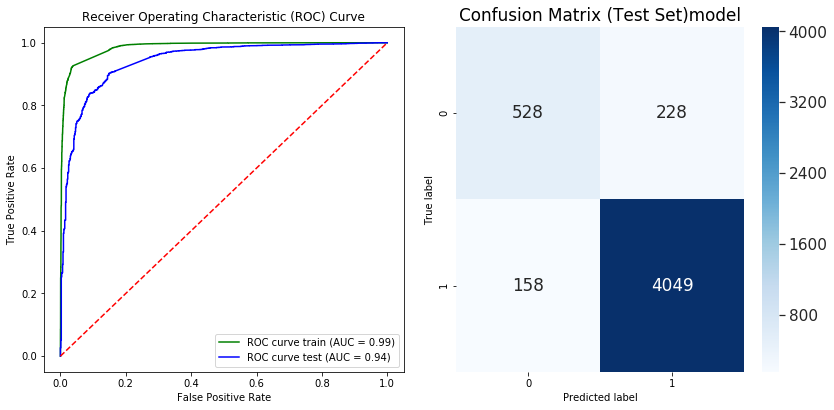

In [19]:
def roc_curve__confusion_matrix(model):
    from sklearn.metrics import roc_curve, auc
    inp_tok, ids = preprocess_input_data(X_test, arabert_tokenizer)
    y_prob_test = model.predict(inp_tok, verbose=True)
    inp_tok_train, ids_train = preprocess_input_data(X_train,arabert_tokenizer)
    y_prob_train = model.predict(inp_tok_train, verbose=True)

  
    prediction=np.where(y_prob_test <0.5,0,1).reshape(len(X_test),1)
    # calculate tpr ,fpr
    fpr_test , tpr_test , thresholds = roc_curve(y_test, y_prob_test)
    fpr_train , tpr_train , thresholds1 = roc_curve(y_train, y_prob_train)

    # calculate AUC score
    roc_auc_test  = auc(fpr_test, tpr_test)
    roc_auc_train  = auc(fpr_train ,tpr_train)


    # calculate confusion matrix for test set
    confusion_matrix_test = confusion_matrix(y_test, prediction)

    # create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # plot ROC curves on the first subplot
    axs[0].plot(fpr_train, tpr_train, color='green', label='ROC curve train (AUC = %0.2f)' % roc_auc_train)
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)model');

    plt.tight_layout()
    plt.show()

roc_curve__confusion_matrix(arabert)

In [20]:
test=["ما عجبنيش","ما فهمتش عليه","ما ننصحش بيه ","ما يستاهلش","خدمة سيئة","جودة ضعيفة","مشاكل كثيرة","بطء في التوصيل",
      "produit super","hlou barcha","عجبني برشا","يعطيك صحة "]
inp_tok, ids= preprocess_input_data(test, arabert_tokenizer)
preds = arabert.predict(inp_tok, verbose=True)
predicted_class=list(np.where(preds <0.5,0,1).reshape(len(preds),1))
pd.DataFrame({"text":test,"prediction":list(preds),"predicted_class":predicted_class})

12/12 [==============================] - 0s 7ms/sample


,text,prediction,predicted_class
0,ما عجبنيش,[0.0031453916],[0]
1,ما فهمتش عليه,[0.00075438985],[0]
2,ما ننصحش بيه,[0.0044021774],[0]
3,ما يستاهلش,[0.0026917101],[0]
4,خدمة سيئة,[0.01082872],[0]
5,جودة ضعيفة,[0.0081838025],[0]
6,مشاكل كثيرة,[0.011711413],[0]
7,بطء في التوصيل,[0.0026372068],[0]
8,produit super,[0.9991015],[1]
9,hlou barcha,[0.9997948],[1]


# Deployment :

In [77]:
def sentiment_analysis(text):
    # Clean the text data
    cleaned_text = data_cleaning(pd.Series(text))

    # Tokenize and preprocess the input data
    input_ids, attention_mask = preprocess_input_data(cleaned_text, arabert_tokenizer)

    # Convert to tensors
    input_ids = tf.convert_to_tensor(input_ids)
    attention_mask = tf.convert_to_tensor(attention_mask)

    # Get the predictions from the model
    predictions = arabert.predict([input_ids, attention_mask])

    # Return the sentiment score and other relevant information
    return predictions[0][0]
    

from transformers import Pipeline
# Create the custom pipeline

class SentimentAnalysisPipeline(Pipeline):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __call__(self, *texts, **kwargs):
        # Call the sentiment_analysis function for each input text
        results = [sentiment_analysis(text) for text in texts]

        # Return the results as a list
        return results



In [54]:
# Create the custom pipeline
sentiment_pipeline = SentimentAnalysisPipeline(model=arabert, tokenizer=arabert_tokenizer)

# Example usage of the pipeline
input_text = "hlou barcha, bravo"
sentiment_result = sentiment_pipeline(input_text)
print(sentiment_result) 



[0.9997769]


In [59]:
# Save model weights
arabert.save_weights("/kaggle/working/arabert_weights.h5")


In [69]:
from transformers import TFBertModel
arabert_test = create_arabert(arabert_model)
arabert_test.load_weights("/kaggle/working/arabert_weights.h5")

In [70]:
text=['bonne initiative']
X_input_ids, X_attention_mask = preprocess_input_data(text, arabert_tokenizer)
preds = arabert_test.predict(X_input_ids, verbose=True)
preds

1/1 [==============================] - 3s 3s/sample


array([[0.9994854]], dtype=float32)

In [72]:
model_instance = create_arabert(model_name='aubmindlab/bert-base-arabert')

# Export the model instance using the SavedModel format
model_instance.save("/kaggle/working/arabert_classification_model")

In [73]:
loaded_model = tf.keras.models.load_model("/kaggle/working/arabert_classification_model")


In [74]:
loaded_model.load_weights("/kaggle/working/arabert_weights.h5")

In [76]:
text=['bonne initiative']
X_input_ids, X_attention_mask = preprocess_input_data(text, arabert_tokenizer)
preds = loaded_model.predict(X_input_ids, verbose=True)
preds

1/1 [==============================] - 1s 1s/sample


array([[0.9994854]], dtype=float32)